# Assignment 5
Name: Keshav Goyal

Roll no: 21BEC2297

In [2]:
#importing neccessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("C:\\Users\\\Downloads\\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.drop(columns=['CustomerID'],axis=1,inplace =True)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

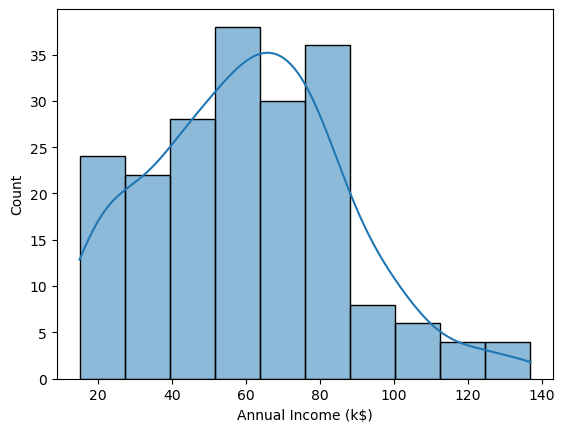

In [9]:
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

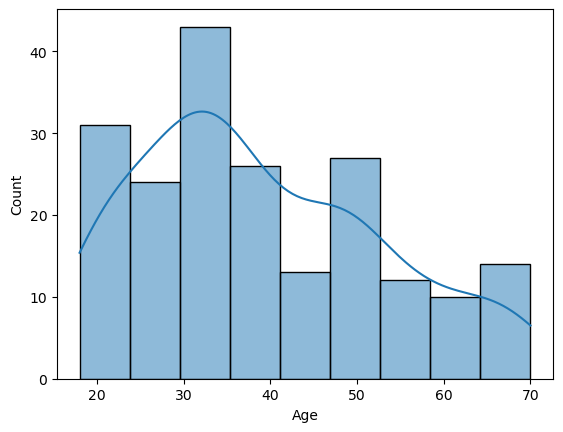

In [10]:
sns.histplot(df['Age'],kde=True)

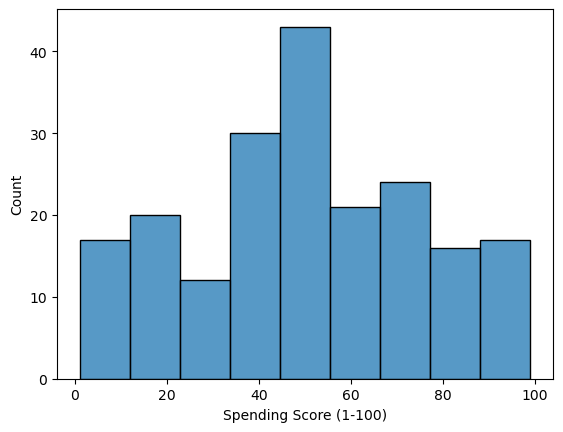

In [11]:
sns.histplot(df['Spending Score (1-100)'])
plt.show()

<Axes: >

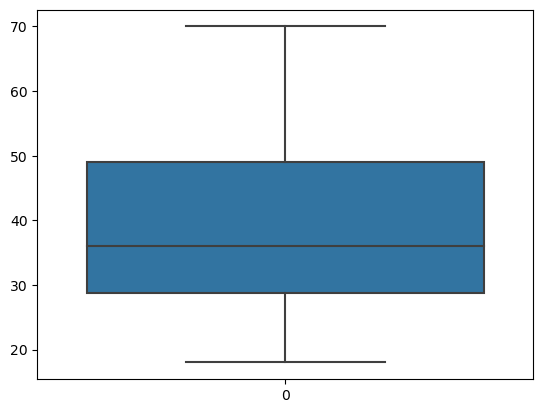

In [12]:
sns.boxplot(df['Age'])

<Axes: >

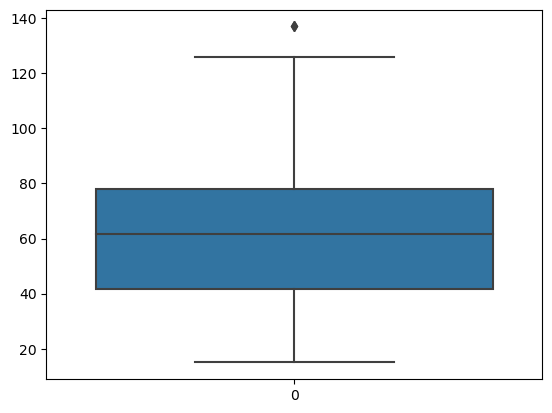

In [13]:
sns.boxplot(df['Annual Income (k$)'])

In [14]:
df['Annual Income (k$)'].median()

61.5

In [15]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


replacing outlayers with the median

In [16]:
x=df['Annual Income (k$)'].quantile(0.75)

In [17]:
y=df['Annual Income (k$)'].quantile(0.25)

x,y

(78.0, 41.5)

In [18]:
IQR=x-y
IQR

36.5

In [19]:
upper_limit=x+1.5*IQR
lower_limit=y-1.5*IQR
print(upper_limit)
print(lower_limit)

132.75
-13.25


<Axes: >

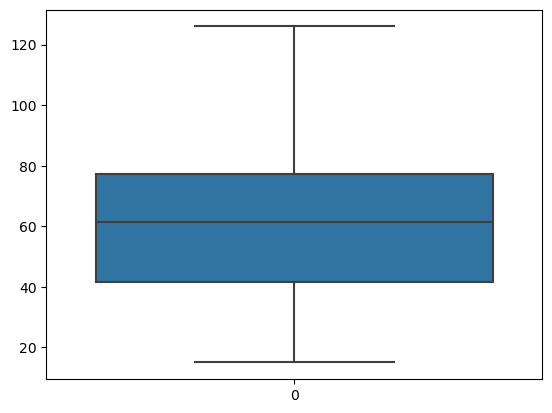

In [20]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

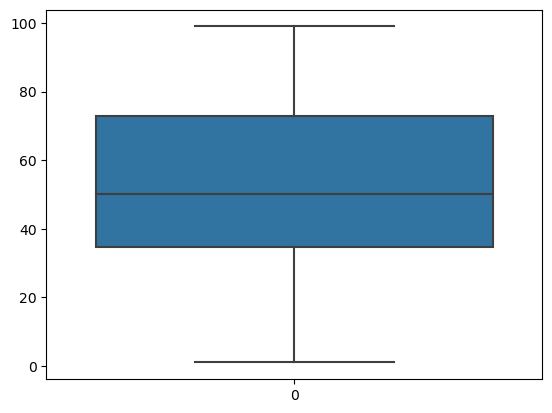

In [21]:
sns.boxplot(df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

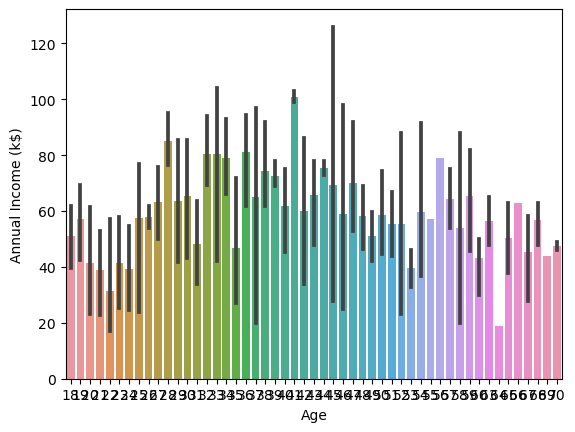

In [22]:
sns.barplot(x=df['Age'],y=df['Annual Income (k$)'])

In [23]:
sns.barplot(x=df['Gender'],y=df['Annual Income (k$)'])

KeyError: 'Gender'

In [ ]:
sns.barplot(x=df['Gender'],y=df['Spending Score (1-100)'])

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
df['Spending Score (1-100)'].value_counts()

In [ ]:
df["Gender"].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.head()

In [ ]:
from sklearn import cluster
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

In [ ]:
error

In [ ]:
plt.title("Elbow Method")
plt.xlabel("no of clusters")
plt.ylabel("error")
plt.plot(range(1,11),error)

In [ ]:
km_model=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)
km_model.fit(df)

In [ ]:
km_model.predict(df)

In [ ]:
#testing 1
km_model.predict([[1,24,50,85]])

In [ ]:
#testing 2
km_model.predict([[0,18,40,76]])

In [ ]:
#testing 3
km_model.predict([[0,20,60,50]])

In [ ]:
#testing 4
km_model.predict([[1,26,30,96]])